In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Create a connection to the SQLite database
conn = sqlite3.connect('../Data/db/fraude_detection_warehouse.db')

In [21]:
transactions = pd.read_sql('SELECT * FROM transactions', conn)
transactions.head()

,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,731b17cfadce442ab756b5b110a406c2,d159ae25b3d04387bbc006b8f0df4629,f66d0310-bf70-4552-a732-5950c93b1134,2020-02-12,depôt,9.385805e+06,réussie,1,Douala
1,96f4ac611eaa4174b39149d98e569810,84d0894d1b9a4a8dbe13cfbb32d451df,f765ead3-ca24-48f4-9252-a6fd5fc53518,2022-02-03,depôt,3.358191e+06,réussie,0,Bafoussam
2,1c11b97ba2994efbb6f85291e7062e00,b01c160bdd134ac989f1d0d0163ac149,9cac18d3-defc-4142-9a39-b66fe1063f6e,2019-11-09,depôt,7.307758e+06,réussie,1,Bafoussam
3,99d146a3fbd04a38a5b83190b4ec22e3,31bd9c0aa340439899f52de6d89ac6eb,40ccde62-b98d-4e6b-bd3f-bf514cae73b9,2018-07-18,transfert,3.127519e+06,réussie,1,Bafoussam
4,bdab6a6430b44fadbf2f1682ccda4ae8,ade32958209d40cfb475e5bef5a2b4a3,16aa8a04-4cbd-48dc-88d2-ef9d0e8a2944,2019-12-29,retrait,4.435274e+06,réussie,0,Yaoundé


In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    100000 non-null  object 
 1   customer_id       100000 non-null  object 
 2   device_id         100000 non-null  object 
 3   transaction_date  100000 non-null  object 
 4   transaction_type  100000 non-null  object 
 5   amount            100000 non-null  float64
 6   status            100000 non-null  object 
 7   is_fraud          100000 non-null  int64  
 8   location          100000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [23]:
transactions.describe(include="all")

,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
count,100000,100000,100000,100000,100000,1.000000e+05,100000,100000.000000,100000
unique,100000,10000,63259,2192,3,NaN,2,NaN,102
top,731b17cfadce442ab756b5b110a406c2,1968113994d547bd95b9a670c4bc9f13,548462e0-47f4-46c4-838a-9c7e7940968c,2019-03-28,depôt,NaN,réussie,NaN,Bamenda
freq,1,24,8,68,50048,NaN,89972,NaN,11350
mean,NaN,NaN,NaN,NaN,NaN,5.587385e+06,NaN,0.567070,NaN
std,NaN,NaN,NaN,NaN,NaN,3.514901e+06,NaN,0.495484,NaN
min,NaN,NaN,NaN,NaN,NaN,1.639254e+02,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.660834e+06,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.309755e+06,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.046252e+06,NaN,1.000000,NaN


changing date type

In [24]:
transactions.transaction_date = pd.to_datetime(transactions.transaction_date)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    100000 non-null  object        
 1   customer_id       100000 non-null  object        
 2   device_id         100000 non-null  object        
 3   transaction_date  100000 non-null  datetime64[ns]
 4   transaction_type  100000 non-null  object        
 5   amount            100000 non-null  float64       
 6   status            100000 non-null  object        
 7   is_fraud          100000 non-null  int64         
 8   location          100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 6.9+ MB


### transaction_type

<Axes: xlabel='transaction_type', ylabel='count'>

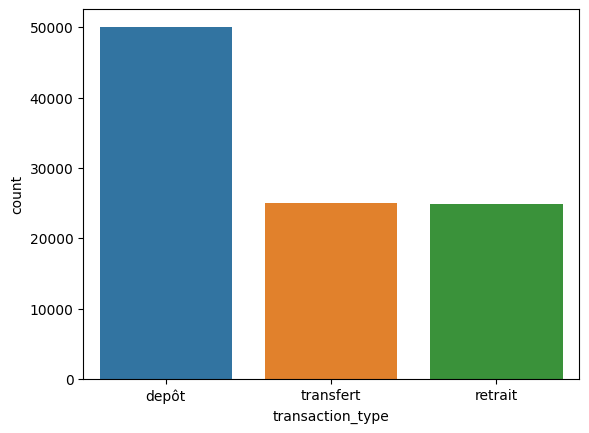

In [25]:
sns.countplot(transactions, x="transaction_type", hue='transaction_type')

In [26]:
transactions.transaction_type.value_counts().sort_values()

transaction_type
retrait      24896
transfert    25056
depôt        50048
Name: count, dtype: int64

In [27]:
length = transactions.shape[0]
# create dataframe percentage of transaction type
proportion = pd.DataFrame(transactions['transaction_type'].value_counts(normalize=True)*100)
proportion

,proportion
transaction_type,
depôt,50.048
transfert,25.056
retrait,24.896


### transaction amount

In [28]:
# transaction amount by transaction type
pd.DataFrame(transactions.groupby('transaction_type').amount.aggregate(['mean', 'median']))

,mean,median
transaction_type,,
depôt,5.580478e+06,5.298153e+06
retrait,5.621055e+06,5.363998e+06
transfert,5.567728e+06,5.276008e+06


In [29]:
transfert = transactions[transactions.transaction_type == 'transfert']
depot = transactions[transactions.transaction_type == 'depôt']
retrait = transactions[transactions.transaction_type == 'retrait']
type_list = [transfert, depot, retrait]


<Axes: xlabel='amount', ylabel='Count'>

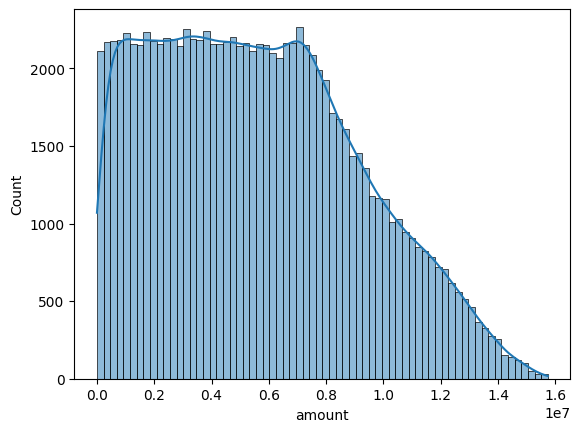

In [30]:
sns.histplot(transactions, x="amount", kde=True)

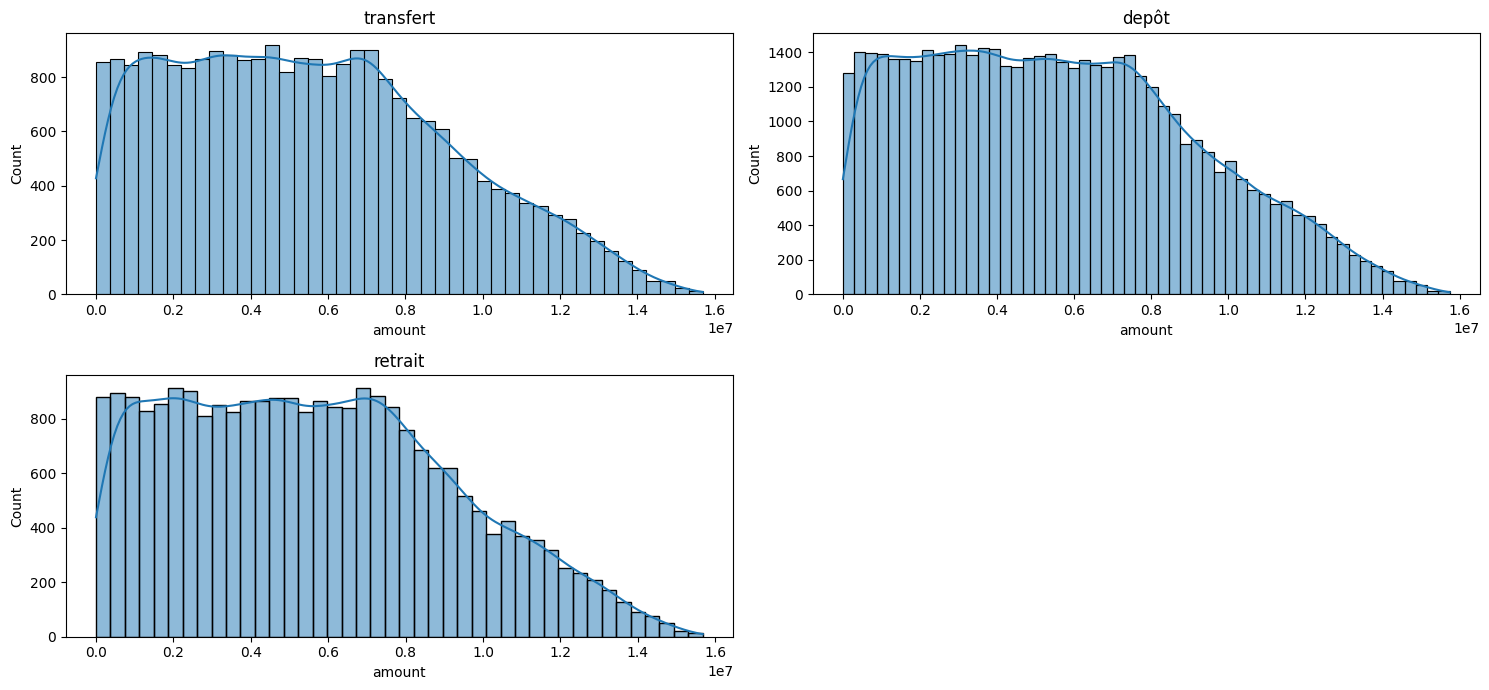

In [31]:
plt.figure(figsize=(15,7))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.histplot(value, x='amount', kde=True)
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

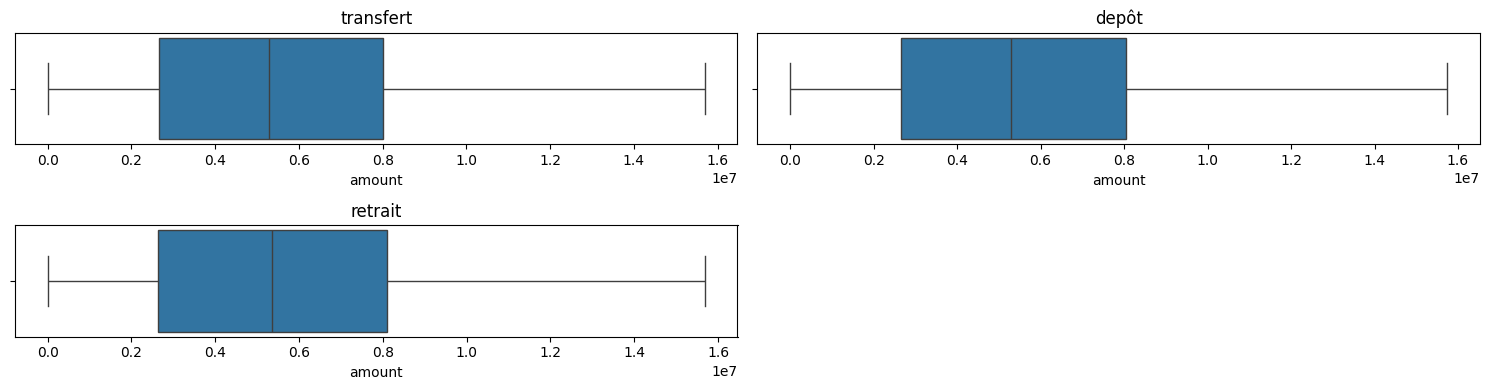

In [32]:
plt.figure(figsize=(15,4))
for i, value in enumerate(type_list, 1):
    plt.subplot(2,2,i)
    sns.boxplot(value, x='amount')
    plt.title(value.transaction_type.iloc[0])
    plt.tight_layout()
    plt.plot()

### Analyse temporelle

In [33]:
transactions['month'] = pd.to_datetime(transactions['transaction_date'].dt.strftime('%Y-%m'))
transactions['week'] = transactions['transaction_date'].dt.isocalendar().week
transactions['month_number'] = transactions['transaction_date'].dt.month
transactions['year'] = transactions['transaction_date'].dt.year

In [34]:
transactions_copy = transactions.set_index('transaction_date')
transactions_copy.head()

,transaction_id,customer_id,device_id,transaction_type,amount,status,is_fraud,location,month,week,month_number,year
transaction_date,,,,,,,,,,,,
2020-02-12,731b17cfadce442ab756b5b110a406c2,d159ae25b3d04387bbc006b8f0df4629,f66d0310-bf70-4552-a732-5950c93b1134,depôt,9.385805e+06,réussie,1,Douala,2020-02-01,7,2,2020
2022-02-03,96f4ac611eaa4174b39149d98e569810,84d0894d1b9a4a8dbe13cfbb32d451df,f765ead3-ca24-48f4-9252-a6fd5fc53518,depôt,3.358191e+06,réussie,0,Bafoussam,2022-02-01,5,2,2022
2019-11-09,1c11b97ba2994efbb6f85291e7062e00,b01c160bdd134ac989f1d0d0163ac149,9cac18d3-defc-4142-9a39-b66fe1063f6e,depôt,7.307758e+06,réussie,1,Bafoussam,2019-11-01,45,11,2019
2018-07-18,99d146a3fbd04a38a5b83190b4ec22e3,31bd9c0aa340439899f52de6d89ac6eb,40ccde62-b98d-4e6b-bd3f-bf514cae73b9,transfert,3.127519e+06,réussie,1,Bafoussam,2018-07-01,29,7,2018
2019-12-29,bdab6a6430b44fadbf2f1682ccda4ae8,ade32958209d40cfb475e5bef5a2b4a3,16aa8a04-4cbd-48dc-88d2-ef9d0e8a2944,retrait,4.435274e+06,réussie,0,Yaoundé,2019-12-01,52,12,2019


Montant de transaction par jour

In [35]:
transactions_per_day = pd.DataFrame(transactions_copy.groupby('transaction_date').amount.aggregate("mean")).reset_index()
fig = px.line(transactions_per_day, x='transaction_date', y='amount', title='transactions_per_day amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Montant de transaction par mois

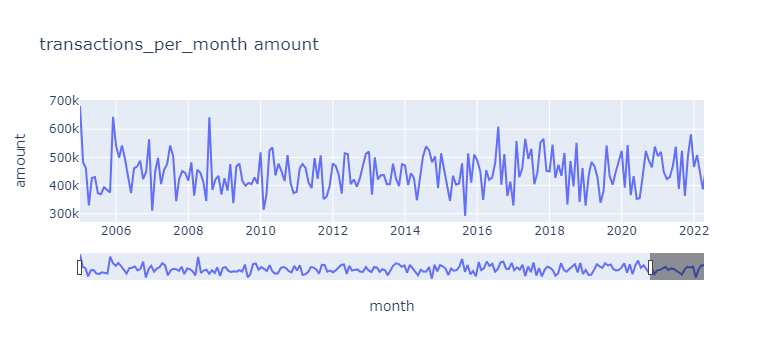

In [ ]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("month").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='month', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Montant de transaction par an

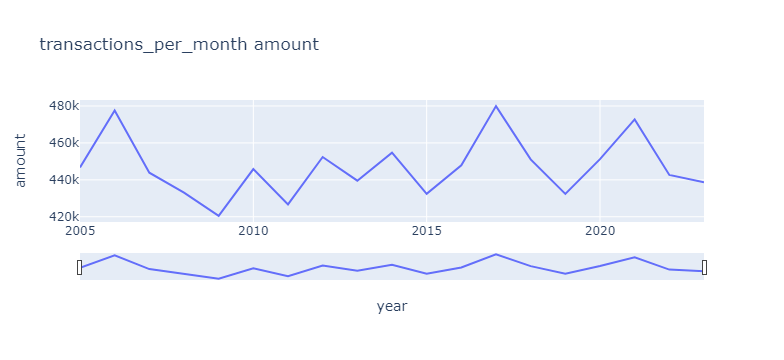

In [ ]:
transactions_per_month = pd.DataFrame(transactions_copy.groupby("year").amount.aggregate('mean')).reset_index()
fig = px.line(transactions_per_month, x='year', y='amount', title='transactions_per_month amount')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par jour

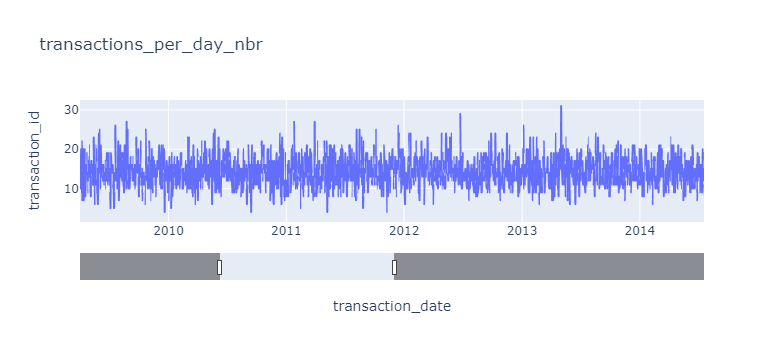

In [ ]:
transactions_per_day_nbr = pd.DataFrame(transactions_copy.groupby("transaction_date").transaction_id.count()).reset_index()
fig = px.line(transactions_per_day_nbr, x='transaction_date', y='transaction_id', title='transactions_per_day_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par mois

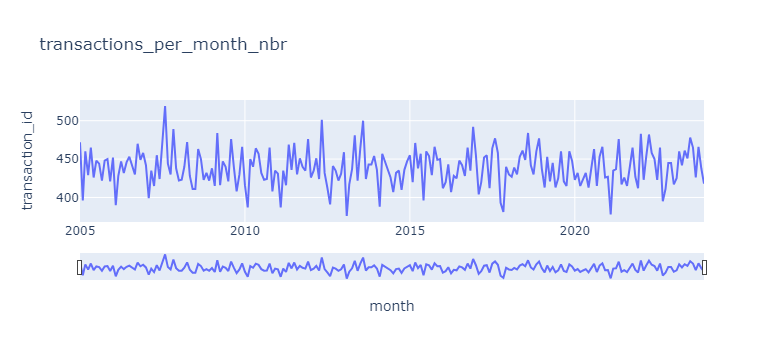

In [ ]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("month").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='month', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Nombre de transaction par an

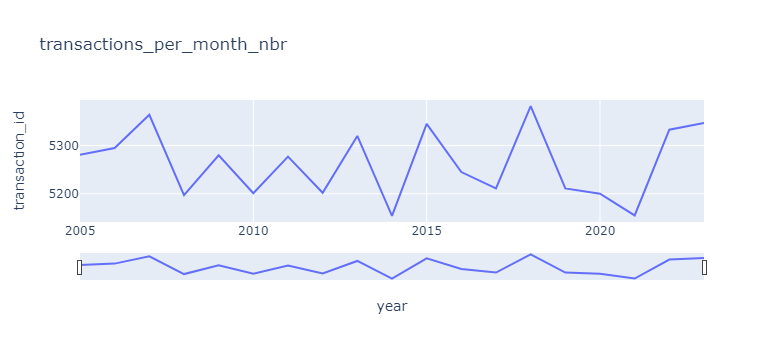

In [ ]:
transactions_per_month_nbr = pd.DataFrame(transactions_copy.groupby("year").transaction_id.count()).reset_index()
fig = px.line(transactions_per_month_nbr, x='year', y='transaction_id', title='transactions_per_month_nbr')

fig.update_xaxes(rangeslider_visible=True)

## DISTRIBUTION DES TYPES D'APPAREILS UTILISES ##

In [36]:
devices = pd.read_sql(" SELECT * FROM DEVICES ", conn)
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device_id     100000 non-null  object
 1   device_type   100000 non-null  object
 2   os            100000 non-null  object
 3   manufacturer  100000 non-null  object
 4   model         100000 non-null  object
 5   last_used     100000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


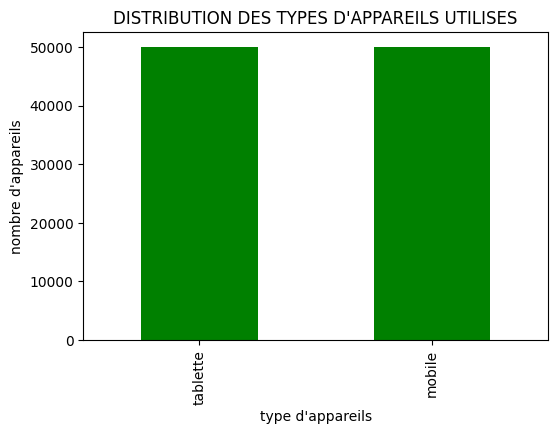

In [37]:
plt.figure(figsize=(6,4))
devices['device_type'].value_counts().plot(kind='bar',color= 'green')

plt.title('DISTRIBUTION DES TYPES D\'APPAREILS UTILISES')
plt.xlabel('type d\'appareils')
plt.ylabel('nombre d\'appareils')
plt.show()

## Distribution des systèmes d'exploitation ##

In [38]:
df=devices['os']
df

0            ios
1            mac
2        android
3            mac
4        android
          ...   
99995    windows
99996      linux
99997    android
99998      linux
99999    android
Name: os, Length: 100000, dtype: object

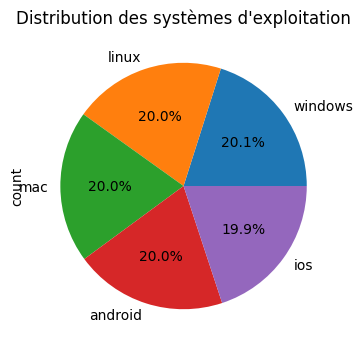

In [39]:
plt.figure(figsize=(5,4))
devices['os'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribution des systèmes d\'exploitation')
#plt.xlabel('type d\'os')
#plt.ylabel('nombre d\'os')
plt.show()

## Nombre de transactions par appareil ##

In [43]:
data= pd.read_sql("SELECT device_id, COUNT(transaction_id) as total_transactions FROM transactions GROUP BY device_id", conn)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63259 entries, 0 to 63258
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   device_id           63259 non-null  object
 1   total_transactions  63259 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 988.5+ KB


,device_id,total_transactions
0,0000e092-4e40-4e61-9ac1-202a1412eb97,2
1,00011ec9-32ee-4abd-95a3-647d7df80c8e,1
2,00029488-5b5e-4c12-b1e7-cd905a87807a,2
3,0003417a-49a7-421b-9637-7397dc9ac744,4
4,000419ac-7192-4c93-9e90-0fd53c1ae4a4,1


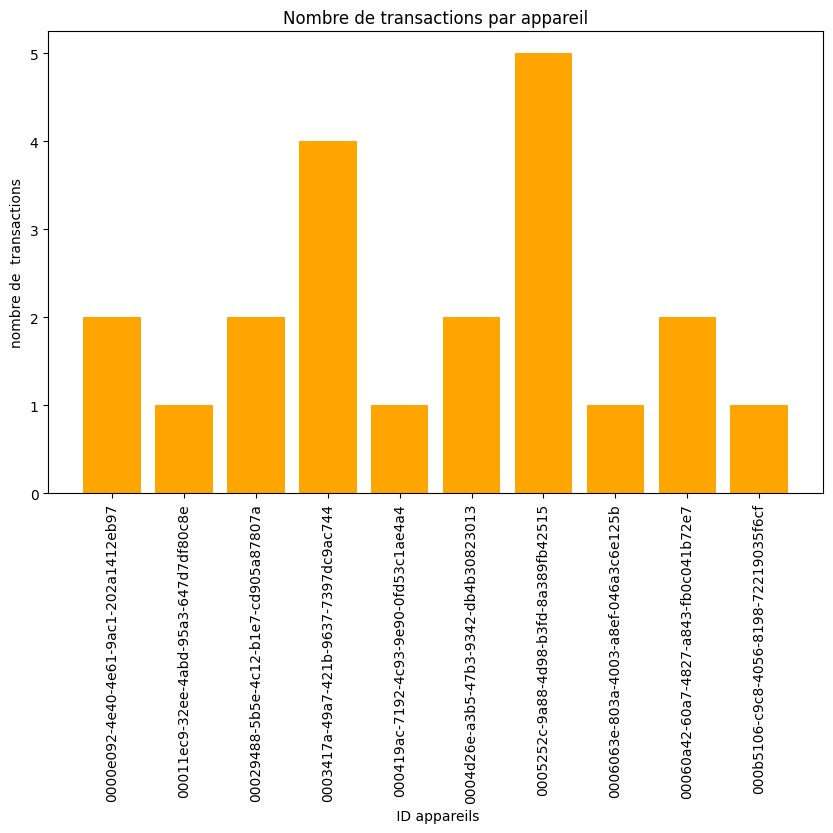

In [45]:
data_limited = data.head(10)  #limiter les donnees aux 20 premieres lignes de la table
plt.figure(figsize=(10,6))

plt.bar(data_limited['device_id'], data_limited['total_transactions'], color='orange')

plt.title('Nombre de transactions par appareil')
plt.xlabel(' ID appareils')
plt.ylabel('nombre de  transactions')
plt.xticks(rotation=90)
plt.show()

## Montant total des transactions par appareil ##

In [47]:
Total_transaction= pd.read_sql("SELECT device_id, SUM(amount) as total_amount FROM transactions GROUP BY device_id", conn)

Total_transaction.head()

,device_id,total_amount
0,0000e092-4e40-4e61-9ac1-202a1412eb97,4.556294e+06
1,00011ec9-32ee-4abd-95a3-647d7df80c8e,2.933652e+06
2,00029488-5b5e-4c12-b1e7-cd905a87807a,1.399644e+07
3,0003417a-49a7-421b-9637-7397dc9ac744,3.293787e+07
4,000419ac-7192-4c93-9e90-0fd53c1ae4a4,1.262878e+06


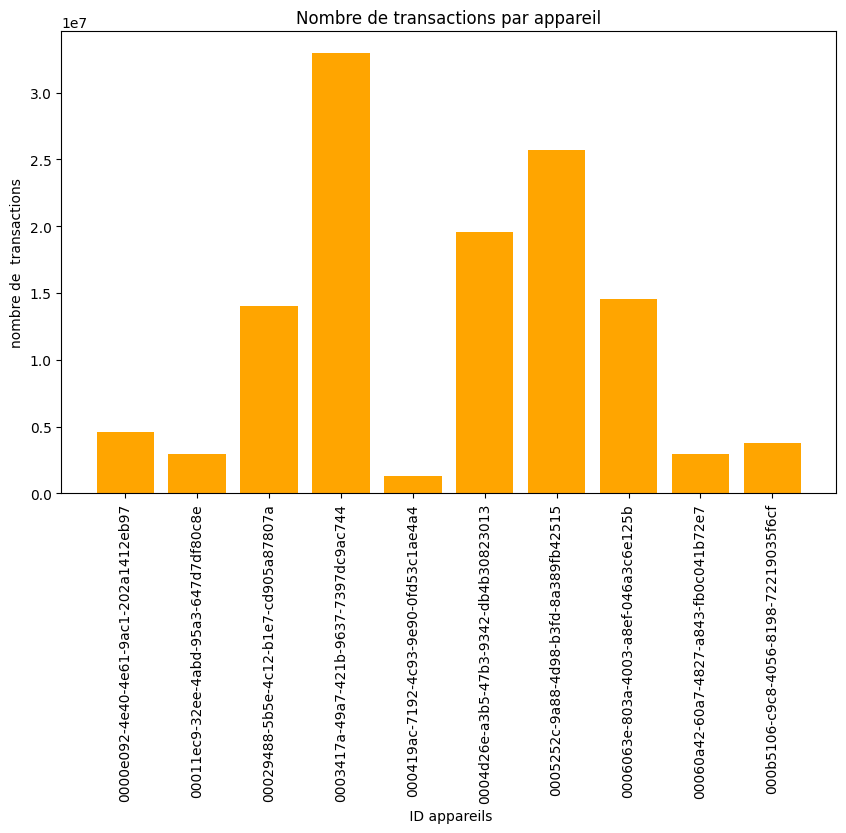

In [48]:
data_limited = Total_transaction.head(10)  #limiter les donnees aux 20 premieres lignes de la table
plt.figure(figsize=(10,6))

plt.bar(data_limited['device_id'], data_limited['total_amount'], color='orange')

plt.title('Nombre de transactions par appareil')
plt.xlabel(' ID appareils')
plt.ylabel('nombre de  transactions')
plt.xticks(rotation=90)
plt.show()

# ANALYSE DES CLIENTS #

## Nombre total de clients actifs (client actif= plus de 3 transactions) ##

In [49]:
Total_clients= pd.read_sql("SELECT  COUNT (*) as active_clients_count FROM (SELECT customer_id FROM transactions GROUP BY customer_id HAVING COUNT(transaction_id) >= 3) as total_customers ", conn)
Total_clients.head()

,active_clients_count
0,9971


In [50]:
clients= pd.read_sql("SELECT * from customers", conn)

clients.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,3690ac9fb2724cd0921a9e196a128fe1,Joseph,Alvarado,Joseph.Alvarado@ortega.com,+237 655777212,2016-09-12,1971-09-10,"2734 Vanessa Ports Suite 010\nMichelleberg, MN...",Bamenda,North-West
1,e25e1f2edc234162bcb914a95397f259,Sara,Thompson,Sara.Thompson@stuart-wilson.com,+237 654044240,2016-05-15,1960-07-14,"038 David Pines\nSouth Juanmouth, VT 52087",Bamenda,North-West
2,42c5133da168479a8ceb49d7ec6454f7,Blake,Wheeler,Blake.Wheeler@jenkins.com,+237 653049060,2016-10-21,1965-05-08,"0115 Perkins Ports\nOlivershire, NE 36010",Douala,Littoral
3,9b32b433b97e494f8150b1b6aa3d6c46,Melanie,Sharp,Melanie.Sharp@osborn.net,+237 676356820,2006-01-09,1983-08-12,"451 Moon Park Apt. 463\nMcphersonstad, MA 16063",Bafoussam,Ouest
4,2e9003baf3b74b339c6fa98377dc2fbd,Deborah,Boyer,Deborah.Boyer@edwards.com,+237 654539474,2008-05-10,1954-01-22,"826 Austin Mill Suite 500\nBaileyville, IN 79796",Douala,Littoral


## Distribution des âges des clients ##

In [53]:
# ajout de la colone age
cursor=conn.cursor()
cursor.execute("ALTER TABLE customers ADD COLUMN age ")

#calcul des ages
cursor.execute("""
               UPDATE customers  SET age= (strftime('%Y' , 'now')- strftime('%Y' , date_of_birth ))- 
                                        (strftime('%m-%d', 'now')< strftime('%m-%d', date_of_birth));
               """)
conn.commit()

In [54]:
age= pd.read_sql("SELECT * FROM customers", conn)
age.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region,age
0,3690ac9fb2724cd0921a9e196a128fe1,Joseph,Alvarado,Joseph.Alvarado@ortega.com,+237 655777212,2016-09-12,1971-09-10,"2734 Vanessa Ports Suite 010\nMichelleberg, MN...",Bamenda,North-West,52
1,e25e1f2edc234162bcb914a95397f259,Sara,Thompson,Sara.Thompson@stuart-wilson.com,+237 654044240,2016-05-15,1960-07-14,"038 David Pines\nSouth Juanmouth, VT 52087",Bamenda,North-West,64
2,42c5133da168479a8ceb49d7ec6454f7,Blake,Wheeler,Blake.Wheeler@jenkins.com,+237 653049060,2016-10-21,1965-05-08,"0115 Perkins Ports\nOlivershire, NE 36010",Douala,Littoral,59
3,9b32b433b97e494f8150b1b6aa3d6c46,Melanie,Sharp,Melanie.Sharp@osborn.net,+237 676356820,2006-01-09,1983-08-12,"451 Moon Park Apt. 463\nMcphersonstad, MA 16063",Bafoussam,Ouest,40
4,2e9003baf3b74b339c6fa98377dc2fbd,Deborah,Boyer,Deborah.Boyer@edwards.com,+237 654539474,2008-05-10,1954-01-22,"826 Austin Mill Suite 500\nBaileyville, IN 79796",Douala,Littoral,70


In [55]:
age= pd.read_sql("SELECT age, COUNT(*) as age_count FROM customers GROUP BY age ", conn)
age.head(10)

,age,age_count
0,30,191
1,31,221
2,32,218
3,33,244
4,34,180
5,35,234
6,36,228
7,37,231
8,38,210
9,39,255


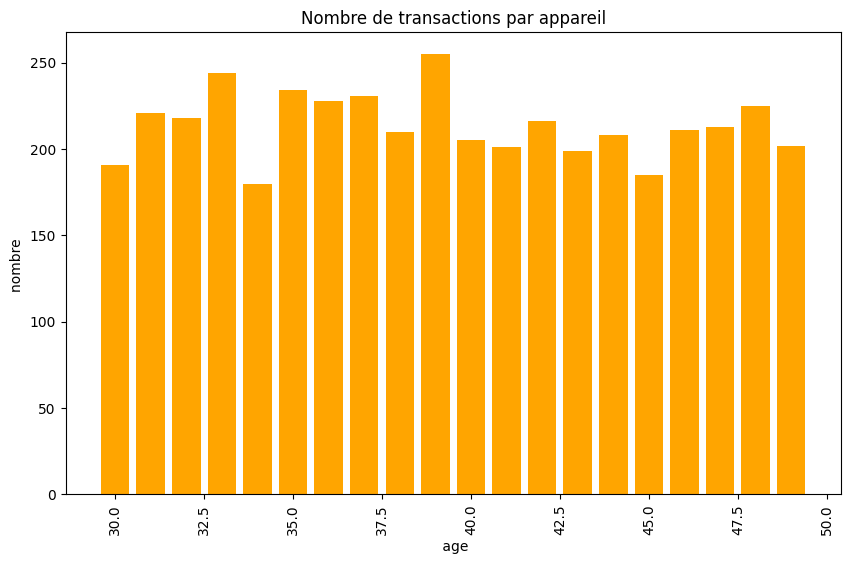

In [56]:
age_limited= age.head(20)
plt.figure(figsize=(10,6))

plt.bar(age_limited['age'], age_limited['age_count'], color='orange')

plt.title('Nombre de transactions par appareil')
plt.xlabel(' age')
plt.ylabel('nombre ')
plt.xticks(rotation=90)
plt.show()

## Nombre moyen de transactions par client ##

In [19]:
moyenne_transaction= pd.read_sql("SELECT customer_id, COUNT(transaction_id) AS num_transaction FROM transactions GROUP BY customer_id", conn)
moyenne_transaction.head()

,customer_id,num_transaction
0,0009b90514a24e7cbaaf61b9f0a2355b,10
1,0014b1fc200946aaba1e277a48475f26,12
2,0017ee0a23ef4568966331951fbbafa5,12
3,0029eb794d1c4a65922da3562b88887c,8
4,002bfc97043348ec8edeaedde6dc6598,13


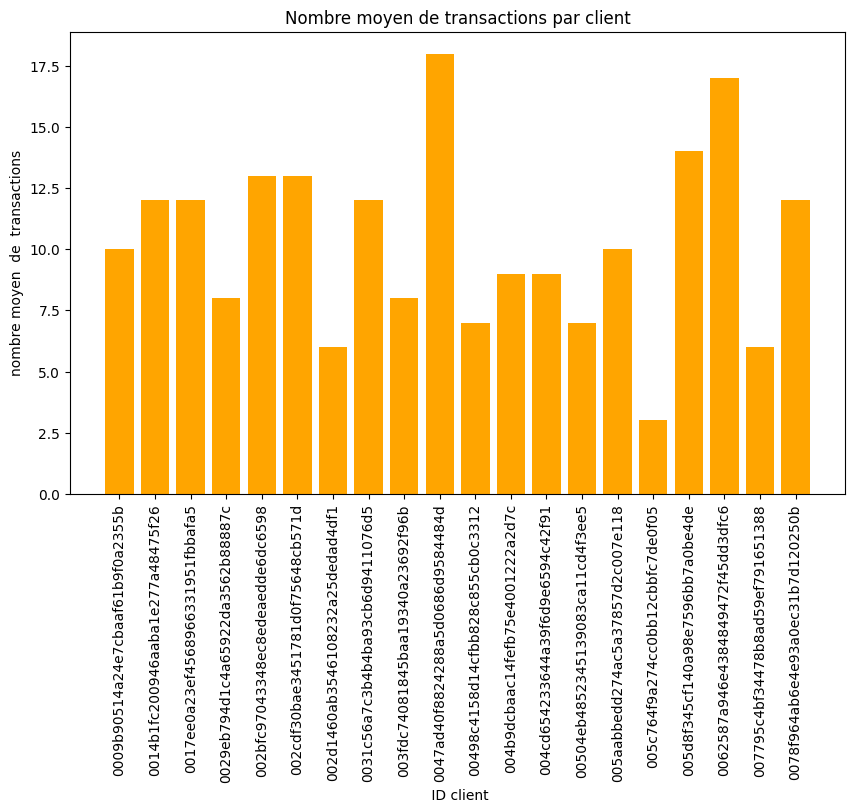

In [20]:
moyenne_transaction_limited= moyenne_transaction.head(20)
plt.figure(figsize=(10,6))

plt.bar(moyenne_transaction_limited['customer_id'], moyenne_transaction_limited['num_transaction'], color='orange')

plt.title('Nombre moyen de transactions par client')
plt.xlabel(' ID client')
plt.ylabel('nombre moyen  de  transactions')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Étape 2: Trouver le nombre maximum de transactions
max_transactions = moyenne_transaction['num_transaction'].max()

24


In [26]:
# Étape 3: Trouver les clients ayant le maximum de transactions
clients_max_transactions = pd.read_sql(f"""
    SELECT c.customer_id, c.age
    FROM customers c
    JOIN (
        SELECT customer_id 
        FROM transactions 
        GROUP BY customer_id  
        HAVING COUNT(transaction_id) = {max_transactions}
    ) t ON c.customer_id = t.customer_id
""", conn)

clients_max_transactions

,customer_id,age
0,1968113994d547bd95b9a670c4bc9f13,46


## Montant moyen des transactions par client. ##

In [60]:
montant_moyen= pd.read_sql("SELECT customer_id, AVG(amount) AS avg_amount FROM transactions GROUP BY customer_id", conn)
montant_moyen.head()

,customer_id,avg_amount
0,0009b90514a24e7cbaaf61b9f0a2355b,7.634580e+06
1,0014b1fc200946aaba1e277a48475f26,5.851485e+06
2,0017ee0a23ef4568966331951fbbafa5,6.334538e+06
3,0029eb794d1c4a65922da3562b88887c,6.625869e+06
4,002bfc97043348ec8edeaedde6dc6598,6.314363e+06


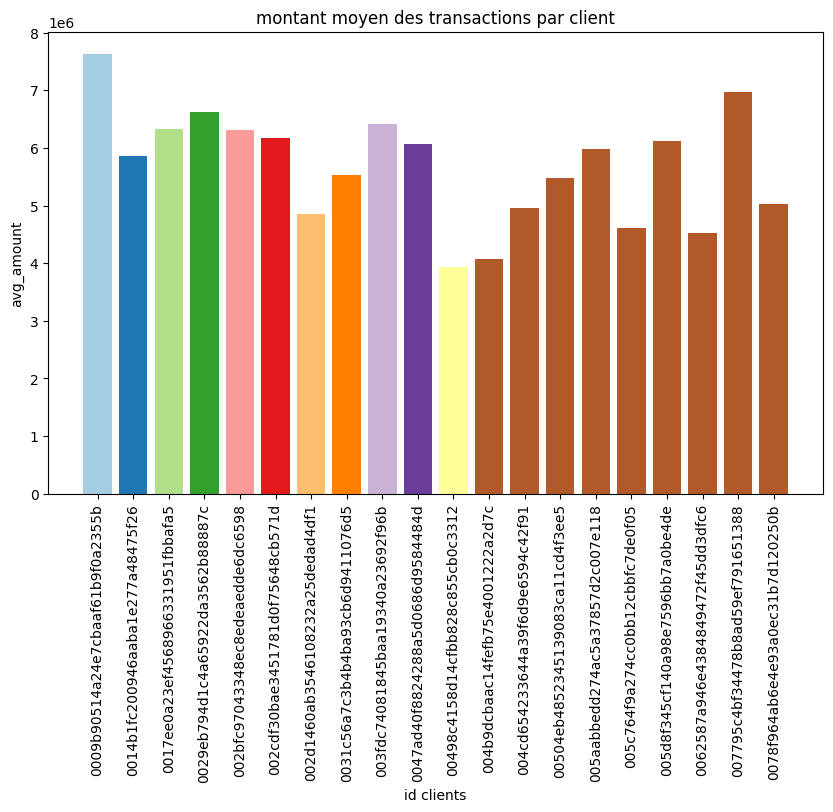

In [61]:
montant_moyen_limited=montant_moyen.head(20)
plt.figure(figsize=(10,6))

plt.bar(montant_moyen_limited['customer_id'], montant_moyen_limited['avg_amount'], color=plt.cm.Paired(range(len(montant_moyen_limited))))

plt.title('montant moyen des transactions par client')
plt.xlabel('id clients')
plt.ylabel('avg_amount')
plt.xticks(rotation=90)
plt.show()

# Alertes de Fraude #

## Nombre total d'alertes générées ##

In [62]:
alertes= pd.read_sql("SELECT COUNT(alert_id) as alert FROM alerts", conn)
alertes

,alert
0,100


## Distribution des types d'alertes ##

In [63]:
distribution_alert= pd.read_sql("SELECT alert_type, COUNT(*) as nbre_alerte FROM alerts GROUP BY alert_type", conn )
distribution_alert.head()

,alert_type,nbre_alerte
0,large transaction,52
1,suspicious activity,48


Text(0, 0.5, 'nombre')

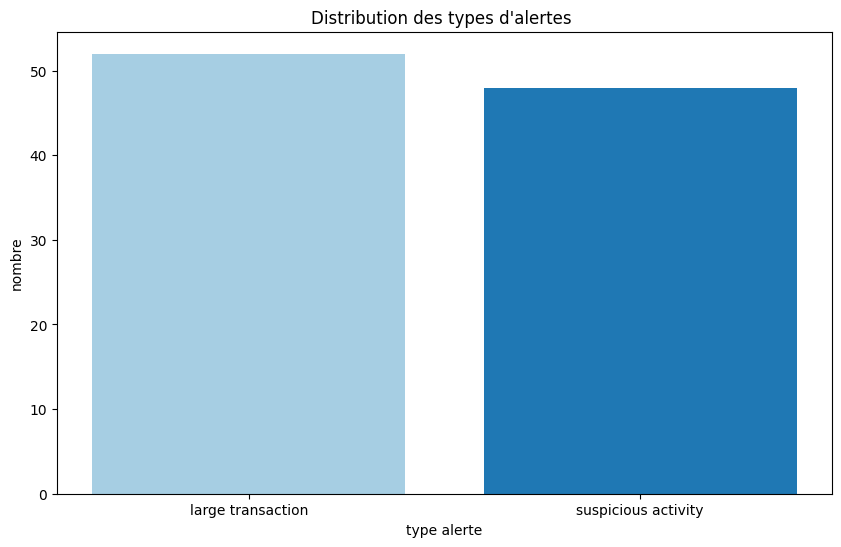

In [64]:
plt.figure(figsize=(10,6))

plt.bar(distribution_alert['alert_type'], distribution_alert['nbre_alerte'], color=plt.cm.Paired(range(len(distribution_alert))))

plt.title('Distribution des types d\'alertes ')
plt.xlabel('type alerte')
plt.ylabel('nombre')

## Taux de résolution des alertes(nombre d'alertes fermées divisé par le nombre total d'alertes). ##

In [65]:
alerte_fermee=   pd.read_sql("SELECT COUNT(alert_status)  FROM alerts WHERE alert_status='closed' ", conn )
alerte_fermee

,COUNT(alert_status)
0,54


In [66]:
total_alerte= pd.read_sql("SELECT COUNT(alert_id)  FROM alerts ", conn)
total_alerte

,COUNT(alert_id)
0,100


In [67]:
taux_resolution= (alerte_fermee['COUNT(alert_status)'][0] / total_alerte['COUNT(alert_id)'][0])*100
print(taux_resolution)

54.0


## Temps moyen de résolution des alertes ##